<a href="https://colab.research.google.com/github/tomasjoh/PCA/blob/PCA/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sat Jun 22 15:52:34 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 485, done.
remote: Counting objects: 100% (216/216), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 485 (delta 146), reused 124 (delta 91), pack-reused 269
Receiving objects: 100% (485/485), 134.51 KiB | 949.00 KiB/s, done.
Resolving deltas: 100% (248/248), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.8 MB/s eta 0:00:00
***********************************************************************
Woo! Your instance has a Tesla T4 GPU!
We will install the latest stable RAPIDS via pip 24.4.*!  Please stand by, should be quick...
***********************************************************************

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 GB 832.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 GB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.8/137.8 MB 

In [ ]:
import cudf

gdf = cudf.DataFrame({"a":[1,2,3],"b":[4,5,6]})
gdf

,a,b
0,1,4
1,2,5
2,3,6


In [ ]:
import cudf
import numpy as np
import pandas as pd
import pickle

from cuml.ensemble import RandomForestClassifier as curfc
from cuml.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier as skrfc
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [ ]:
n_samples = 2**12
n_features = 399
n_info = 300
data_type = np.float32

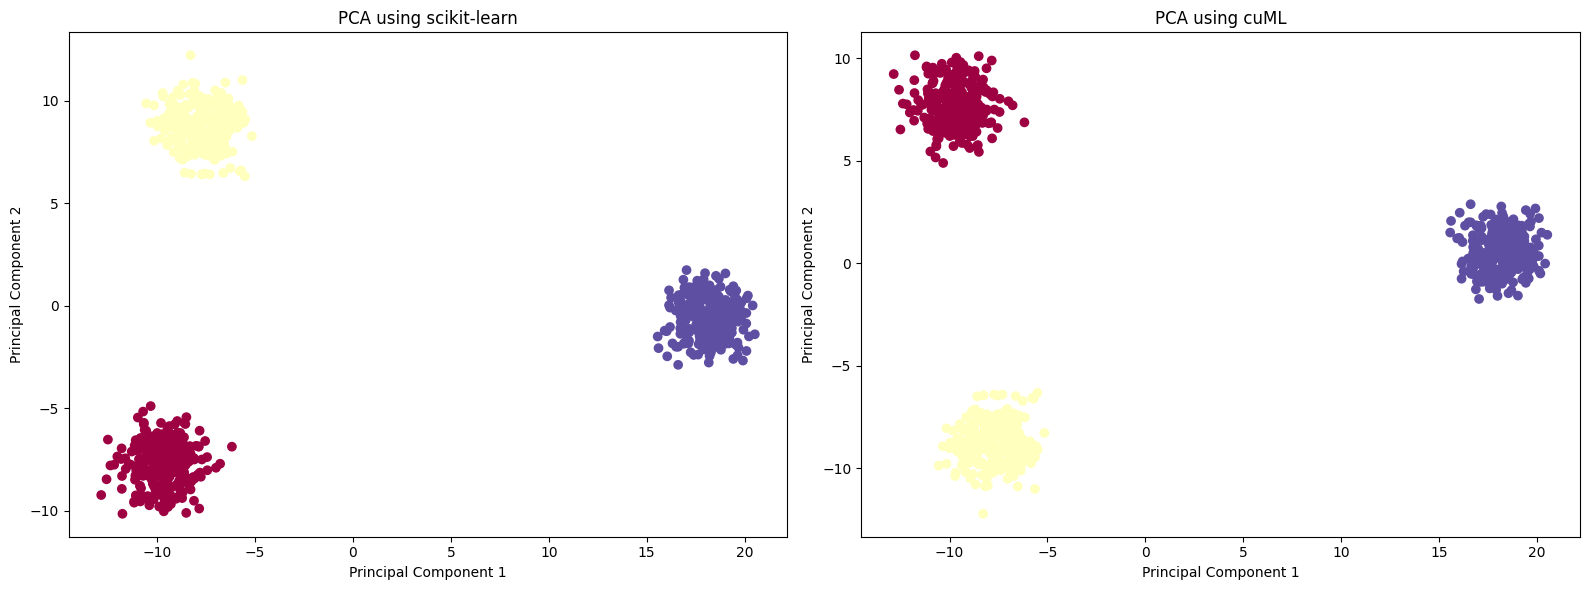

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA as skPCA
import cudf
from cuml.decomposition import PCA as cuPCA

# Generate sample data
X, y = make_blobs(n_samples=1000, centers=3, n_features=10, random_state=42)

# Convert data to pandas DataFrame
X_df = pd.DataFrame(X)
y_series = pd.Series(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y_series, test_size=0.2, random_state=0)

# Convert pandas DataFrame to cuDF DataFrame for GPU processing
X_cudf_train = cudf.DataFrame.from_pandas(X_train)
X_cudf_test = cudf.DataFrame.from_pandas(X_test)

# Apply PCA using cuML
cu_pca = cuPCA(n_components=2)
X_cuml_pca_train = cu_pca.fit_transform(X_cudf_train)

# Apply PCA using scikit-learn
sk_pca = skPCA(n_components=2)
X_sklearn_pca_train = sk_pca.fit_transform(X_train)

# Convert the cuML PCA result back to pandas DataFrame for plotting
X_cuml_pca_train_df = X_cuml_pca_train.to_pandas()

# Plot the transformed data
plt.figure(figsize=(16, 6))

# Plot the scikit-learn PCA result
plt.subplot(1, 2, 1)
plt.scatter(X_sklearn_pca_train[:, 0], X_sklearn_pca_train[:, 1], c=y_train, cmap=plt.cm.Spectral)
plt.title("PCA using scikit-learn")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Plot the cuML PCA result
plt.subplot(1, 2, 2)
plt.scatter(X_cuml_pca_train_df.iloc[:, 0], X_cuml_pca_train_df.iloc[:, 1], c=y_train, cmap=plt.cm.Spectral)
plt.title("PCA using cuML")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()
